[View in Colaboratory](https://colab.research.google.com/github/nxhong93/CDHA/blob/master/basic.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
!pip install -q scikit-plot
import numpy as np
import pandas as pd
import pickle
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import xgboost as xgb
import scikitplot.plotters as skplt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
train_text = pd.read_csv('drive/My Drive/app/t/nlp/basic/training_text', sep = '\|\|', skiprows=1, header = None, names=['ID', 'Text'])
train_variants = pd.read_csv('drive/My Drive/app/t/nlp/basic/training_variants')
test_text = pd.read_csv('drive/My Drive/app/t/nlp/basic/test_text', sep = '\|\|', skiprows=1, header = None, names=['ID', 'Text'])
test_variants = pd.read_csv('drive/My Drive/app/t/nlp/basic/test_variants')
train = pd.merge(train_variants, train_text, how = 'left', on = 'ID').dropna()
train, _ = train_test_split(train, test_size=0.7, random_state=8)
test = pd.merge(test_variants, test_text, how = 'left', on = 'ID').dropna()
print(train.sample(4))
print(test.sample(4))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


        ID   Gene             Variation  Class  \
143    143   EGFR                 G735S      7   
3015  3015    KIT          N564_Y578del      2   
3013  3013    KIT                 I653T      2   
287    287  ARID2  Truncating Mutations      1   

                                                   Text  
143   While epidermal growth factor receptor (EGFR) ...  
3015   A 57-year-old man with gastrointestinal strom...  
3013  Context  Some melanomas arising from acral, mu...  
287   In eukaryotic cells, DNA is packaged into chro...  
        ID  Gene Variation                                               Text
4240  4240  IRF6      R84H  Many sequence variants in predisposition genes...
4714  4714  ARSA     T276M  The phosphatidylinositol 3-kinase (PI3K) pathw...
309    309  BSND       R8W  Advanced urothelial carcinoma (UC) of the blad...
5299  5299   GAA     P545L  mTOR-complex 2 (mTORC2) contains the mammalian...


In [0]:
def evaluate_features(X, y, clf = 'None'):
	clf = LogisticRegression()
	probas = cross_val_predict(clf, X, y, cv = StratifiedKFold(random_state=8), n_jobs = -1, method = 'predict_proba', verbose = -2)
	pred_indices = np.argmax(probas, axis=1)
	class_ = np.unique(y)
	preds = class_[pred_indices]
	print('Log loss: {}'.format(log_loss(y, probas)))
	print('Accuracy: {}'.format(accuracy_score(y, preds)))
	skplt.plot_confusion_matrix(y, preds)

In [0]:
count_vt = CountVectorizer(tokenizer=word_tokenize, stop_words='english')
bag_of_words = count_vt.fit_transform(train['Text'])

In [0]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncatedSVD = svd.fit_transform(bag_of_words)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


Log loss: 1.7849945623305377
Accuracy: 0.48993963782696176


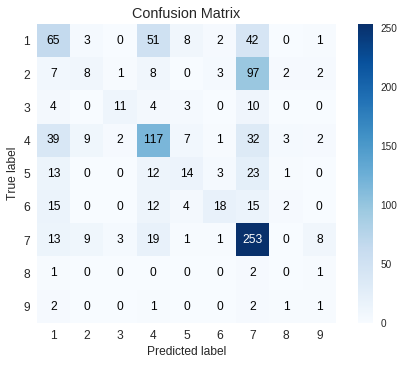

In [14]:
evaluate_features(truncatedSVD, train['Class'].values.ravel())